In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

# Load data

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

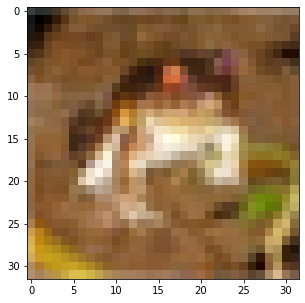

In [6]:
plt.figure(figsize=(15,5))
plt.imshow(X_train[0])

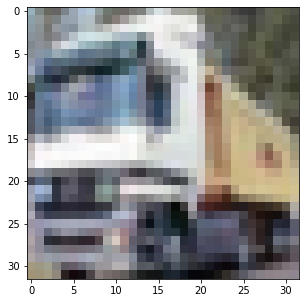

In [7]:
plt.figure(figsize=(15,5))
plt.imshow(X_train[1])

# Preprocessing :

In [8]:
y_train=y_train.reshape(-1,)

In [9]:
y_train.shape

(50000,)

In [10]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [11]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [14]:
print(y_train_categorical.shape)
print(y_test_categorical.shape)

(50000, 10)
(10000, 10)


In [15]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

In [16]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train_categorical,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 43ms/step - loss: nan - accuracy: 0.0998
Epoch 2/5
1563/1563 [==============================] - 63s 41ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 68s 43ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 75s 48ms/step - loss: nan - accuracy: 0.1000


In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report:\n',classification_report(y_test,y_pred_classes))

classification report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN

In [29]:
CNN_model=keras.Sequential([
    
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])

In [30]:
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
CNN_model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.9439 - accuracy: 0.3919
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2932 - accuracy: 0.5431
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1360 - accuracy: 0.6054
Epoch 4/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0242 - accuracy: 0.6455
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9398 - accuracy: 0.6731
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8731 - accuracy: 0.6963
Epoch 7/20
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7980 - accuracy: 0.7242
Epoch 8/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7483 - accuracy: 0.7405
Epoch 9/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6949 - accuracy: 0.7563
Epoch 10/20
1563/1563 [==============================] - 26s 17m

In [32]:
CNN_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8807 - accuracy: 0.6224


[1.8807246685028076, 0.6223999857902527]

In [33]:
y_pred2_CNN=CNN_model.predict(X_test)
y_pred2_CNN[:5]

array([[6.3902196e-03, 4.1041011e-03, 4.1360296e-02, 2.2324103e-01,
        6.9965906e-03, 4.0683918e-02, 6.3262635e-01, 6.2253093e-03,
        7.8262240e-03, 3.0546026e-02],
       [1.7131226e-05, 1.3375402e-04, 1.9843571e-11, 9.1664686e-13,
        8.3703330e-13, 9.4038625e-16, 8.8540540e-15, 7.7493882e-13,
        9.9984908e-01, 6.2322836e-10],
       [1.0876854e-02, 3.3297171e-04, 1.5037867e-06, 1.6792481e-03,
        2.5013589e-05, 1.4628863e-03, 3.7413545e-05, 1.1924630e-03,
        9.8434240e-01, 4.9293845e-05],
       [9.8142070e-01, 1.3709865e-06, 5.6974091e-05, 6.0679434e-07,
        5.0184393e-04, 1.9061663e-09, 1.3911925e-07, 1.1270771e-08,
        1.8018462e-02, 1.4733504e-09],
       [5.5452678e-05, 4.2525845e-04, 5.6135243e-01, 3.8121432e-02,
        1.8395342e-01, 1.5556865e-03, 2.1445811e-01, 9.7502289e-06,
        6.6415079e-05, 2.0484908e-06]], dtype=float32)

In [34]:
np.argmax([5,12,1,2])

1

In [35]:
np.argmax(y_pred2_CNN[0])

6

In [36]:
y_classes=[np.argmax(element) for element in y_pred2_CNN]
y_classes[:5]

[6, 8, 8, 0, 2]

In [37]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
#==>the prediction is wrong in the 1st and 5th case